In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# HW3

In [104]:
clamp = lambda x, mi, ma: max(mi, min(ma, x))

In [105]:
def return_to_base(a, b):
    return 50

def random_explore(dist_to_ally, dist_to_base):
    return clamp(70 - 10 * dist_to_base + 70 * np.exp(-0.4 * dist_to_ally), 0, 100)

In [106]:
DIST_TO_BASE = np.linspace(0, 10, 100)
DIST_TO_ENEMY = np.linspace(0, 5, 100)
DIST_TO_ALLY = np.linspace(0, 10, 100)

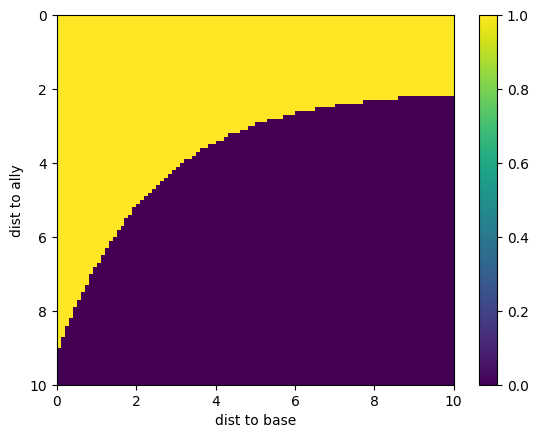

In [107]:
img = np.zeros((DIST_TO_BASE.shape[0], DIST_TO_ALLY.shape[0]))
ht = np.zeros((4, DIST_TO_BASE.shape[0], DIST_TO_ALLY.shape[0]))
# TODO: Vectorize
for x, base in enumerate(DIST_TO_BASE):
    for y, ally in enumerate(DIST_TO_ALLY):
        utility = np.array([return_to_base(ally, base), random_explore(ally, base)])
        for i in range(utility.shape[0]):
            ht[i][x][y] = utility[i]
        img[x][y] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img, extent=[0, 10, 10, 0])
ax.set_aspect('auto')
ax.set_xlabel("dist to base")
ax.set_ylabel("dist to ally")


plt.colorbar(im)

In [108]:
def attack_enemy(dist_to_enemy, dist_to_base):
    return clamp((5 - 2 * dist_to_enemy) * (100 - 10 * dist_to_base), 0, 100)

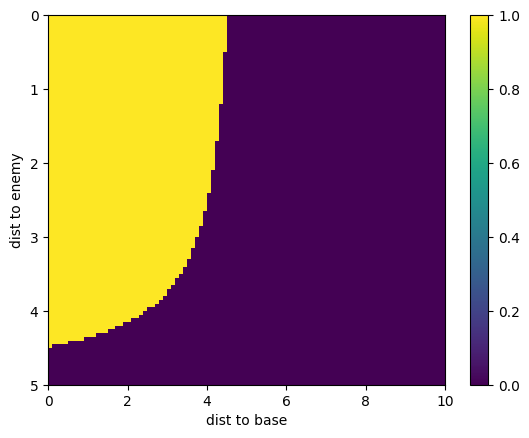

In [109]:
img = np.zeros((DIST_TO_BASE.shape[0], DIST_TO_ENEMY.shape[0]))
ht = np.zeros((4, DIST_TO_BASE.shape[0], DIST_TO_ENEMY.shape[0]))
# TODO: Vectorize
for x, base in enumerate(DIST_TO_BASE):
    for y, enemy in enumerate(DIST_TO_ENEMY):
        utility = np.array([return_to_base(enemy, base), attack_enemy(enemy, base)])
        for i in range(utility.shape[0]):
            ht[i][x][y] = utility[i]
        img[x][y] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img, extent=[0, 10, 5, 0])
ax.set_aspect('auto')
ax.set_xlabel("dist to base")
ax.set_ylabel("dist to enemy")


plt.colorbar(im)